<a href="https://colab.research.google.com/github/jyotinain/UNP-PROJECTS/blob/main/gender_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOGISTC REGRESSION

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
%matplotlib inline
sns.set(font_scale=1.5)

#IMPORTING DATA

In [ ]:
data=pd.read_excel("gender_classification_v7.xlsx",header=0)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


#CHECKING IF THERE ARE ANY MISSING VALUES

In [ ]:
data.isna().sum()  #to check null vales

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
data.shape  #gives us the number of rows and columns

(5001, 8)

In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].unique())      #gives the unique values in each column

[1 0]
[11.8 14.  14.4 13.5 13.  15.3 11.9 12.1 12.5 15.5 14.7 14.5 14.2 15.2
 14.6 12.8 12.9 12.2 12.3 12.7 14.1 11.5 13.8 13.7 12.  11.4 15.4 13.3
 13.2 14.3 13.9 11.7 15.1 15.  12.4 11.6 12.6 14.8 13.1 13.4 13.6 14.9]
[6.1 5.4 6.3 5.9 6.8 6.2 5.2 5.8 6.7 6.5 6.  5.6 7.  6.4 5.3 5.7 5.1 5.5
 7.1 6.6 6.9]
[1 0]
[0 1]
[1 0]
[1 0]
['Male' 'Female']


In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].value_counts())     #gives the count of unique values in each column

1    4349
0     652
Name: long_hair, dtype: int64
12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64
5.7    306
5.9    303
5.3    301
5.5    299
6.1    296
5.1    293
6.2    290
5.8    290
6.4    287
6.3    285
6.5    285
5.6    279
6.0    275
5.4    265
5.2    259
6.6    126
6.8    118
7.0    117
7.1    113
6.9    109
6.7    105
Name: forehead_height_cm, dtype: int64
0    2531
1    2470
Name: nose_wide, dtype: int64
1    2540
0    2461
Name: nose_long, dtype: int64
0    2535
1    2466
Name: lips_thin, d

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


#DATA CLEANING

In [ ]:
data["gender"] = data["gender"].replace({'Male': 0, 'Female': 1})

#CHECKING OULIERS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


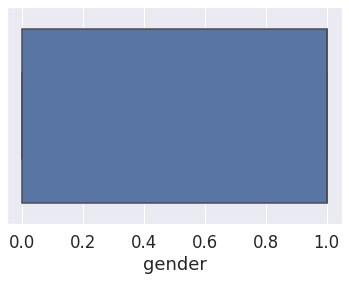

In [ ]:
sns.boxplot(data['gender'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


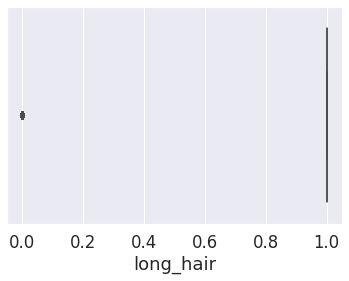

In [ ]:
sns.boxplot(data['long_hair'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


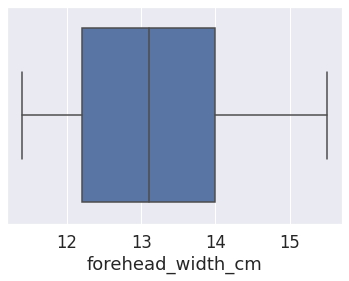

In [ ]:
sns.boxplot(data['forehead_width_cm'])   #for checking outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


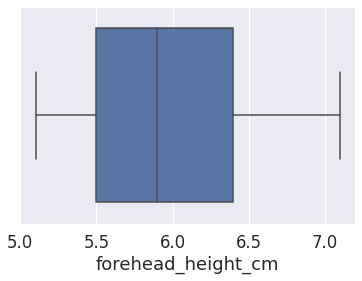

In [ ]:
sns.boxplot(data['forehead_height_cm'])    

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


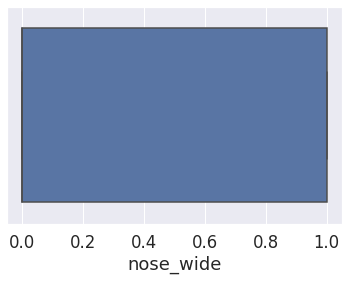

In [ ]:
sns.boxplot(data['nose_wide']) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


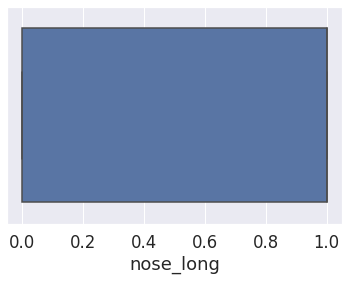

In [ ]:
sns.boxplot(data['nose_long']) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


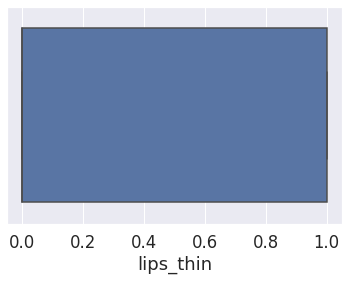

In [ ]:
sns.boxplot(data['lips_thin']) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


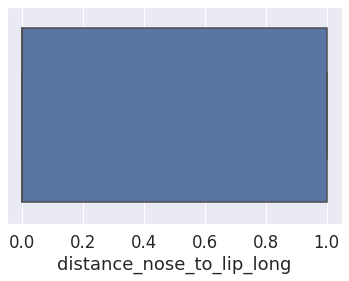

In [ ]:
sns.boxplot(data['distance_nose_to_lip_long']) 

# EDA

##Pair Plot

<Figure size 3600x3600 with 0 Axes>

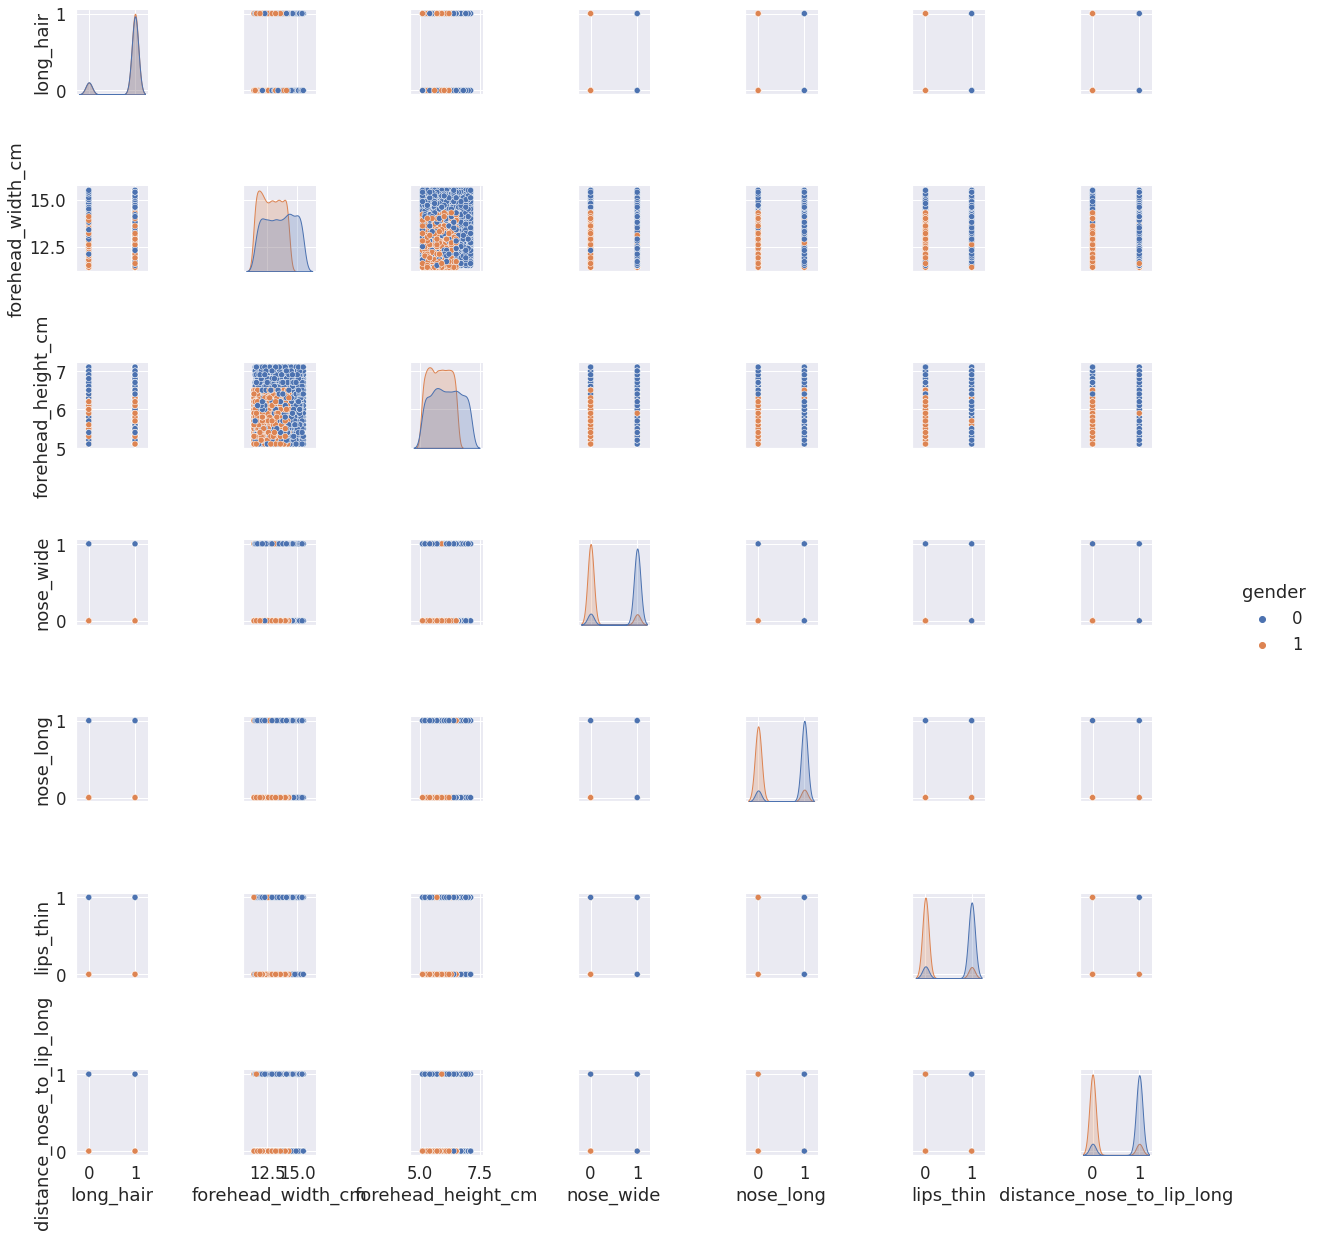

In [ ]:
plt.figure(figsize = (50,50))
sns.pairplot(data,hue='gender')

##Correlation Plot

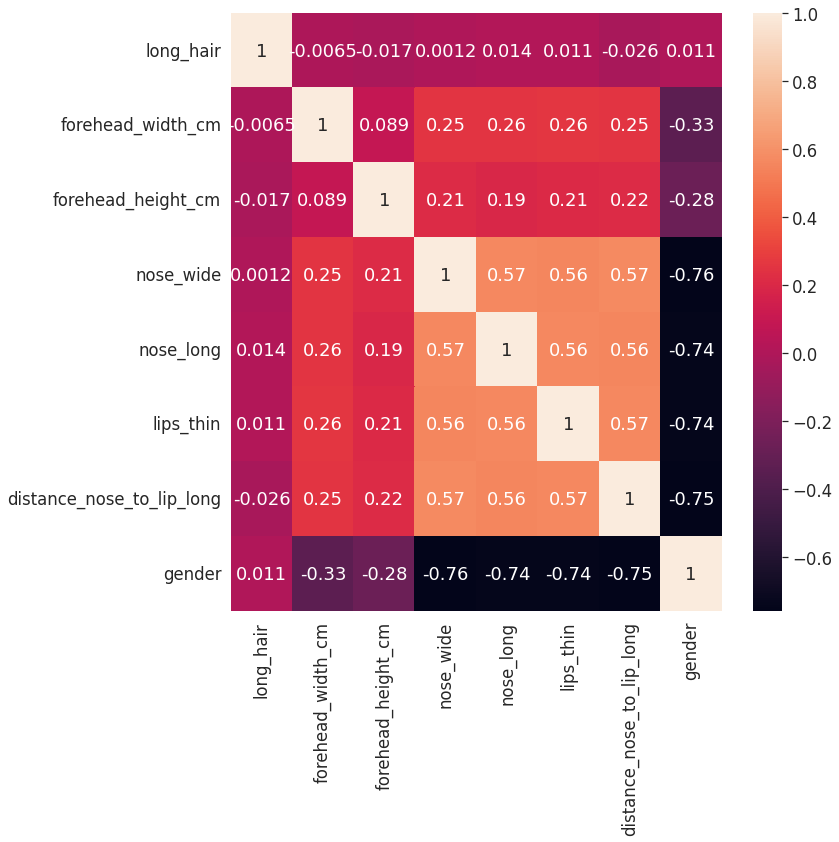

In [ ]:
plt.figure(figsize = (11,11))
ax=sns.heatmap(data.corr(),annot=True)

##kde plot

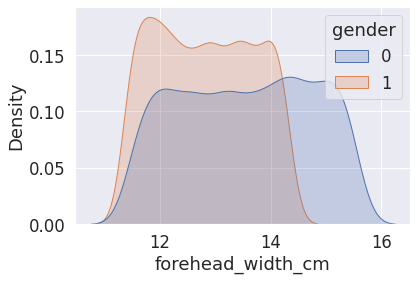

In [ ]:
sns.kdeplot(data['forehead_width_cm'],hue=data['gender'],shade='True');

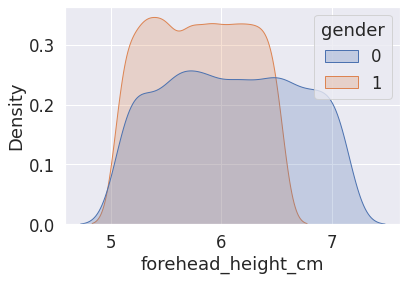

In [ ]:
sns.kdeplot(data['forehead_height_cm'],hue=data['gender'],shade='True');

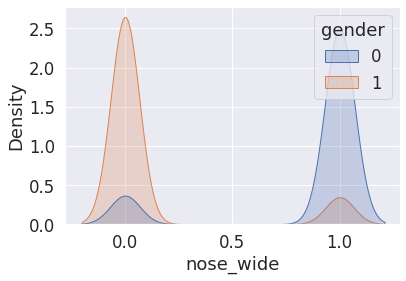

In [ ]:
sns.kdeplot(data['nose_wide'],hue=data['gender'],shade='True');

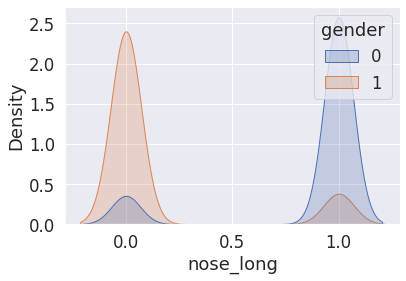

In [ ]:
sns.kdeplot(data['nose_long'],hue=data['gender'],shade='True');

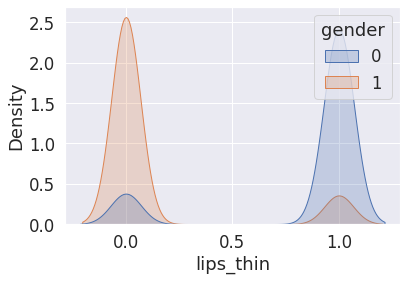

In [ ]:
sns.kdeplot(data['lips_thin'],hue=data['gender'],shade='True');

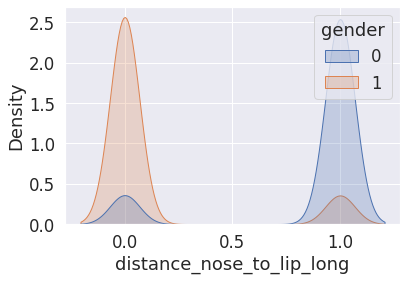

In [ ]:
sns.kdeplot(data['distance_nose_to_lip_long'],hue=data['gender'],shade='True');

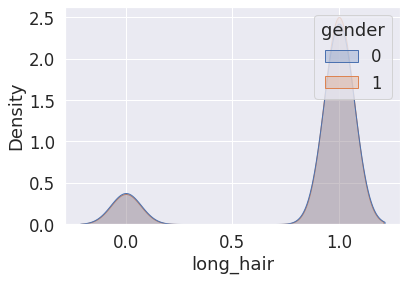

In [ ]:
sns.kdeplot(data['long_hair'],hue=data['gender'],shade='True');

##Pie Chart

<function matplotlib.pyplot.show(*args, **kw)>

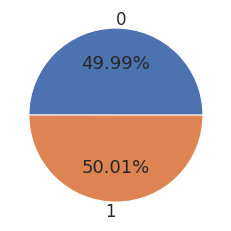

In [ ]:
y = data.groupby("gender")["gender"].count()
y

plt.pie(y, labels=y.index, autopct="%.2f%%")
plt.show

##Bar Plot

In [ ]:
c = data.groupby('gender')['forehead_width_cm'].mean()
c

gender
0    13.551440
1    12.811675
Name: forehead_width_cm, dtype: float64

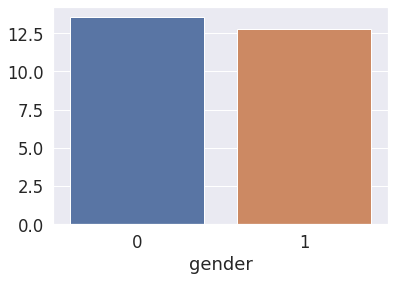

In [ ]:
sns.barplot(y=c.values,x=c.index)      

In [ ]:
d = data.groupby('gender')['forehead_height_cm'].mean()
d

gender
0    6.096360
1    5.796321
Name: forehead_height_cm, dtype: float64

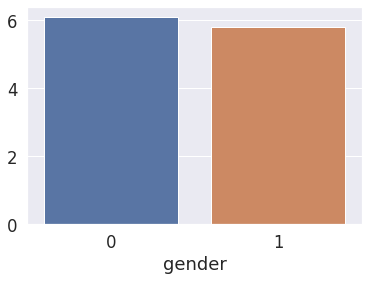

In [ ]:
sns.barplot(y=d.values,x=d.index)

we observe that there is not much difference between the average height and width of forehead between male and female

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [ ]:
e = data.groupby('gender')['long_hair'].sum()
e

gender
0    2165
1    2184
Name: long_hair, dtype: int64

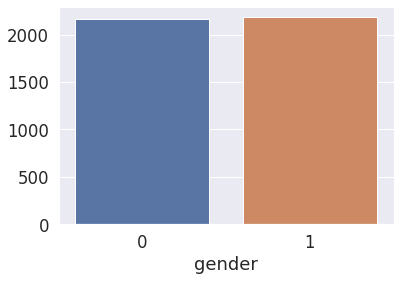

In [ ]:
sns.barplot(y=e.values,x=e.index)

we observe that there is not much difference between lengths of the hair between male and female according to the data

In [ ]:
f = data.groupby('gender')['nose_wide'].sum()
f 

gender
0    2183
1     287
Name: nose_wide, dtype: int64

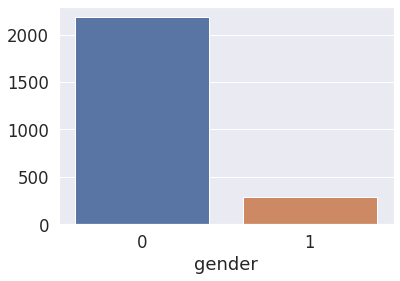

In [ ]:
sns.barplot(y=f.values,x=f.index)         

we observe that majority of the males have a wider nose

In [ ]:
g = data.groupby('gender')['nose_long'].sum()
g

gender
0    2200
1     340
Name: nose_long, dtype: int64

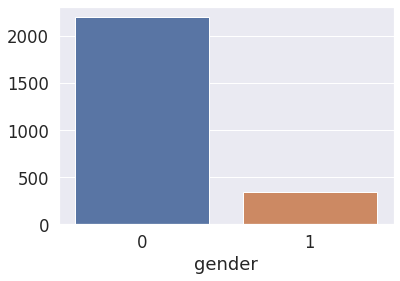

In [ ]:
sns.barplot(y=g.values,x=g.index) 

we observe that majority of the males also have longer nose

In [ ]:
h = data.groupby('gender')['lips_thin'].sum()
h

gender
0    2162
1     304
Name: lips_thin, dtype: int64

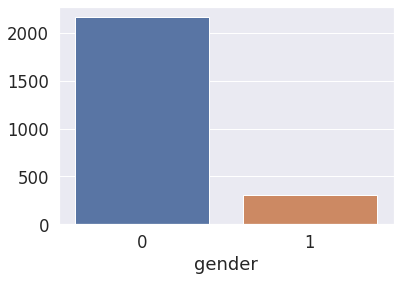

In [ ]:
sns.barplot(y=h.values,x=h.index)

we observe that majority of the males have thinner lips

In [ ]:
i = data.groupby('gender')['distance_nose_to_lip_long'].sum()
i

gender
0    2191
1     304
Name: distance_nose_to_lip_long, dtype: int64

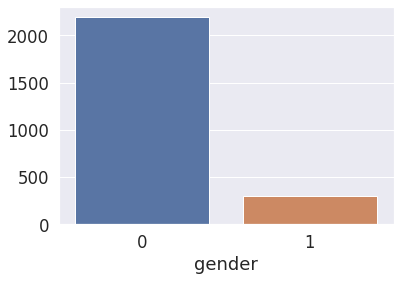

In [ ]:
sns.barplot(y=i.values,x=i.index)

##Line Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


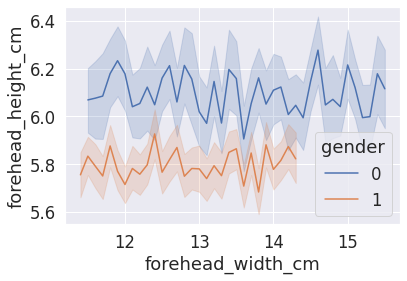

In [ ]:
sns.lineplot('forehead_width_cm', 'forehead_height_cm', hue='gender',data=data);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


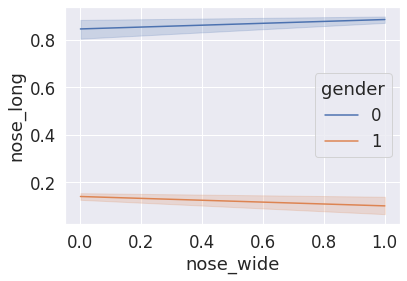

In [ ]:
sns.lineplot('nose_wide', 'nose_long', hue='gender', data=data);

even here we observe that majority of males have a long distance between nose and lip

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


# Predictive analysis

In [ ]:
data.head() ,"forehead_width_cm","forehead_height_cm","long_hair"

(   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
 0          1               11.8                 6.1          1          0   
 1          0               14.0                 5.4          0          0   
 2          0               11.8                 6.3          1          1   
 3          0               14.4                 6.1          0          1   
 4          1               13.5                 5.9          0          0   
 
    lips_thin  distance_nose_to_lip_long  gender  
 0          1                          1       0  
 1          1                          0       1  
 2          1                          1       0  
 3          1                          1       0  
 4          0                          0       1  ,
 'forehead_width_cm',
 'forehead_height_cm',
 'long_hair')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop("gender",axis=1)
y = data["gender"]

##K-fold cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

logreg=LogisticRegression()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
scores = cross_val_score(logreg, X, y, scoring='neg_mean_absolute_error')

In [ ]:
from numpy import mean
print(mean(scores))

-0.03179220779220779


In [ ]:
print("Avg accuracy: {}".format(scores.mean()))

Avg accuracy: -0.03179220779220779


##Train-Test

###Model-1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.2, random_state=55)

In [ ]:
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9665083729067733

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1934,   83],
       [  51, 1933]])

###Model-2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.3, random_state=55)

In [ ]:
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.967723507569266

The accuracy of the model is 97%

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1691,   71],
       [  42, 1697]])

###Model-3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.4, random_state=55)

In [ ]:
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred)

0.9670109963345551

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1455,   51],
       [  48, 1447]])

###Model-4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.1, random_state=55)

In [ ]:
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy_score(y_test,y_pred)

0.9660075538769163

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2170,   98],
       [  55, 2178]])

###Model-5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.25, random_state=55)

In [ ]:
logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_test,y_pred)

0.9658757664622767

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1809,   77],
       [  51, 1814]])

##NEURAL NETWORK

###ADAM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.3, random_state=55)

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([
                      
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history= model.fit(X_train, y_train, epochs= 500, verbose=0)

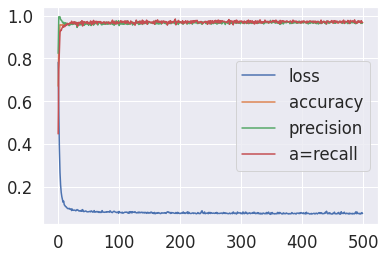

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9669 - precision: 0.9593 - a=recall: 0.9747


[0.07677220553159714,
 0.9668666124343872,
 0.9592529535293579,
 0.9746981263160706]

###SGD

In [ ]:
import tensorflow as tf
tf.random.set_seed(55)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history= model.fit(X_train, y_train, epochs= 50, verbose=0)

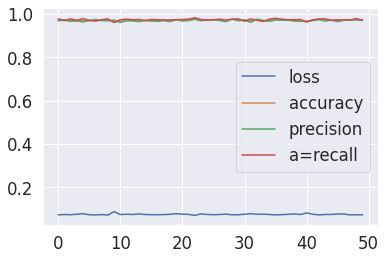

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model1.evaluate(X_test, y_test)

110/110 [==============================] - 1s 2ms/step - loss: 1.5209 - accuracy: 0.5033 - precision: 0.0000e+00 - a=recall: 0.0000e+00


[1.5209084749221802, 0.503284752368927, 0.0, 0.0]

#NEURAL NETWORK WITH DIFFERENT ARCHITECTURE AND TRAIN-TEST MODELS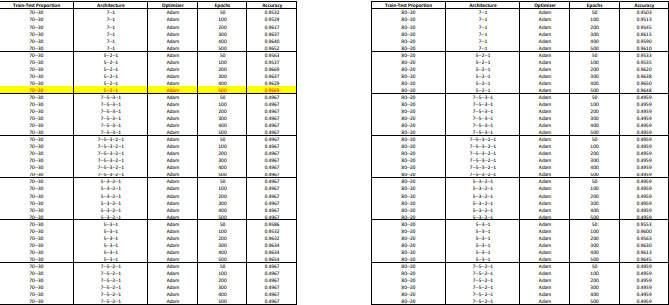

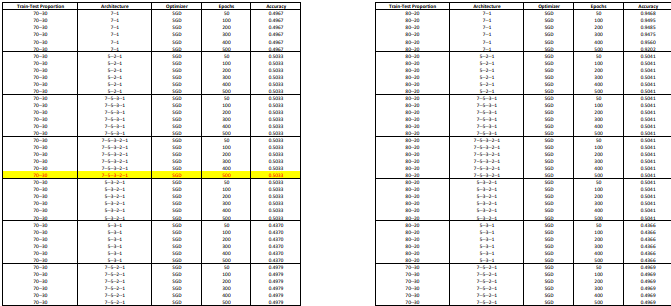

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
accuracy = accuracy_score(y_test,model.predict(X_test))
accuracy

0.9722740602505998

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1691,   71],
       [  42, 1697]])

#SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn import svm

In [ ]:
cls=svm.SVC(kernel='rbf')

In [ ]:
cls.fit(X_train,y_train)

SVC()

In [ ]:
accuracy = accuracy_score(y_test,cls.predict(X_test))
accuracy

0.969562319484559

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1691,   71],
       [  42, 1697]])

#BAGGING

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

##Bagging Classifier

In [ ]:
clf = BaggingClassifier(n_estimators = 100, random_state = 42)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
y_pred = a.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9620758483033932

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[225,  10],
       [  9, 257]])

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, random_state=50)

In [ ]:
b = tree.fit(X_train, y_train)

In [ ]:
y_pred = b.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9780439121756487

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[228,   7],
       [  4, 262]])

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators =100, random_state = 50)

In [ ]:
c = rf.fit(X_train, y_train)

In [ ]:
y_pred = c.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9720558882235529

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[229,   6],
       [  8, 258]])

#BOOSTING

##Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=50)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
y_pred = d.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9800399201596807

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[227,   8],
       [  2, 264]])

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost= GradientBoostingClassifier(max_depth=5,learning_rate=0.01,random_state=0,n_estimators=1000)

In [ ]:
e = grad_boost.fit(X_train, y_train)

In [ ]:
y_pred = e.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,e.predict(X_test))
accuracy

0.9800399201596807

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[229,   6],
       [  4, 262]])

##XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost=xgb.XGBClassifier(random_state=50,learning_rate=0.01,n_estimators=700)

In [ ]:
f = xgb_boost.fit(X_train, y_train)

In [ ]:
y_pred = f.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9840319361277445

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[228,   7],
       [  1, 265]])